### Data Exploration and Preparation

#### The Titanic Case - Prediction on Survival

- The sinking of the Titanic is one of the most infamous shipwrecks in history

- Reasons for passengers who survived
    - Women, Children
    - Upper-class / Social status
    - ...

- In this very first project, we are trying to analyze **what types of people were likely to survive**

- You can refer to the following link to know more about the project https://www.kaggle.com/c/titanic 

#### Data Exploration

- Before we start our analysis, it is always a good practice to look into our data first

In [3]:
# import useful libraries used for data loading and management

import pandas as pd 
import numpy as np 

In [4]:
# load training and test datasets for titanic case

train = pd.read_csv('titanic_train.csv', index_col='PassengerId')
test = pd.read_csv('titanic_test.csv', index_col='PassengerId')

In [5]:
# Type in the name of the data frame to view the dataset

train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [7]:
# Use .shape to get the dimensions of the dataset (i.e., number of records and number of features)

train.shape

(891, 11)

In [12]:
test.shape

(418, 10)

In [13]:
# Use .head() to view the first 5 instances

train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
# Use .info() to get the types of features

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [16]:
# Use .describe() to get the summary statistics of numeric features (count, mean, standard deviation, min, Q1, Q2, Q3, and max)

train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
# Use [].describe() to get the statistics of a feature

train['Cabin'].describe()

count             204
unique            147
top       C23 C25 C27
freq                4
Name: Cabin, dtype: object

#### Handle Missing Values

- There are missing values for 'Age', 'Cabin', and 'Embarked'

In [18]:
# You can use .isnull() to find out the instances that have missing values

train[train['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [19]:
# Replace missing values in 'Age' with mean (numeric variables)

train['Age'].fillna(train['Age'].mean(),inplace=True)

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [21]:
# Use .describe() to find out the most frequent value for ‘Embarked’

train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [22]:
# Replace missing values in ‘Embarked’ with the most frequent value (mode) "S"

train['Embarked'].fillna(train['Embarked'].value_counts().index[0], inplace = True)

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


#### Remove Columns

- There are 687 rows that miss the value for 'Cabin', it might not be a best way to fill the NaNs with mode, and in this case, we can simply remove the whole column of 'Cabin'

In [24]:
# Use .drop() to delete a column

train = train.drop(columns='Cabin')

In [25]:
# Use .info() to check again the information about the train dataset

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 76.6+ KB


### Data Visualization

- Visual representation of data
- To communicate information clearly and efficiently
- Effective visualization helps users analyze and reason about data and evidence
- Types
    - Box plot
    - Scatter plot
    - Histogram / Bar chart

In [26]:
# Import useful libraries for data visualization

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(18,6))

<Figure size 1296x432 with 0 Axes>

#### Box Plot

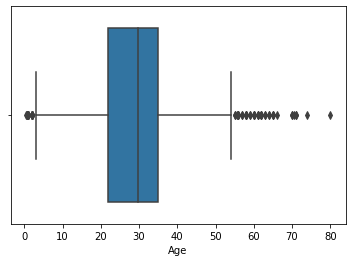

In [27]:
# Boxplot for one single numeric variable

ax=sns.boxplot(train['Age'])

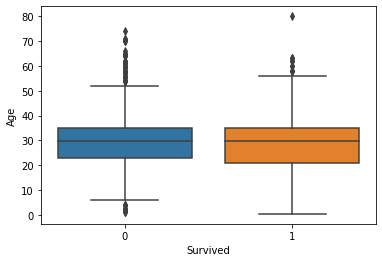

In [28]:
# Two dimensional boxplot, let’s see what is the distribution of 'Age' by 'Survived'

ax=sns.boxplot(x=train['Survived'], y=train['Age'])

#### Histogram

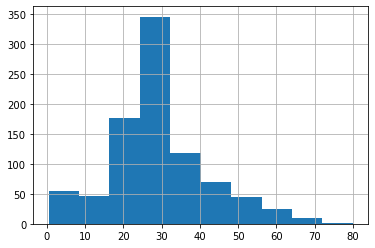

In [29]:
# Use .hist() to create histogram chart for a numeric variable

ax=train['Age'].hist()

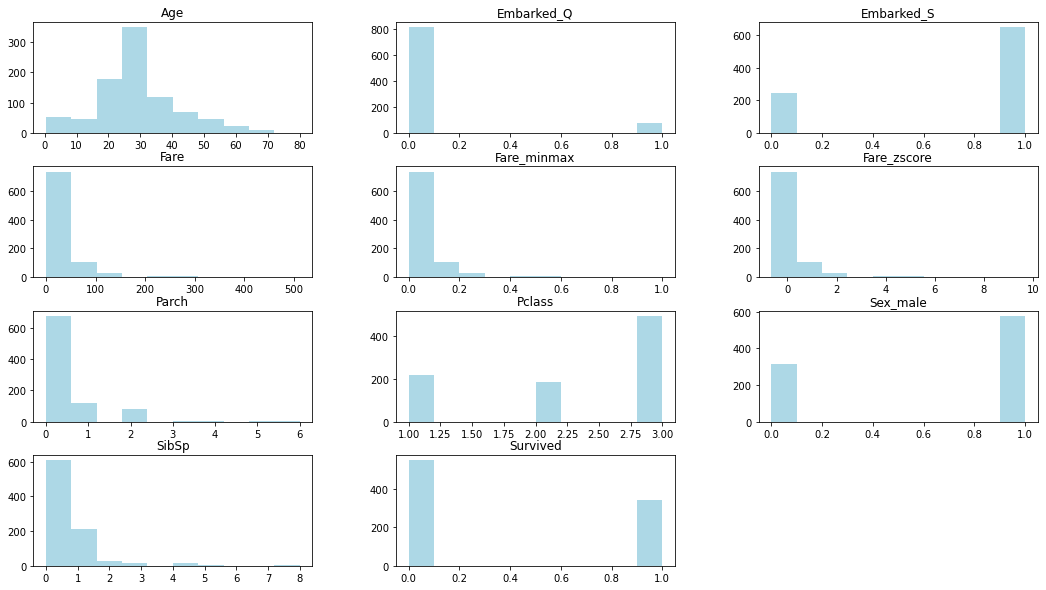

In [54]:
# Use .hist() to create histogram charts for all numeric variables

ax=train.hist(color= 'lightblue',bins=10,figsize = (18,10),grid=False)

#### Bar Chart

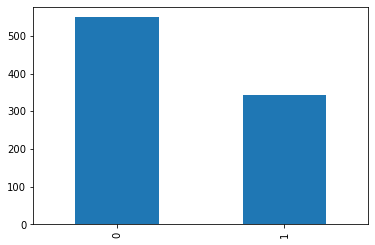

In [33]:
# Use .value_counts().plot to create bar chart for a categorical variable

ax=train['Survived'].value_counts().plot(kind='bar')

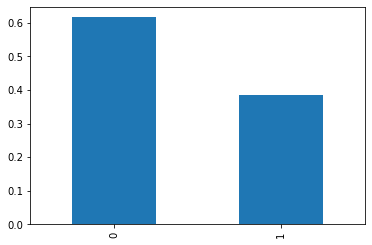

In [34]:
# If you apply normalization to 'Survived', you can get the distribution bounded between [0,1]

ax=train['Survived'].value_counts(normalize=True).plot(kind='bar')

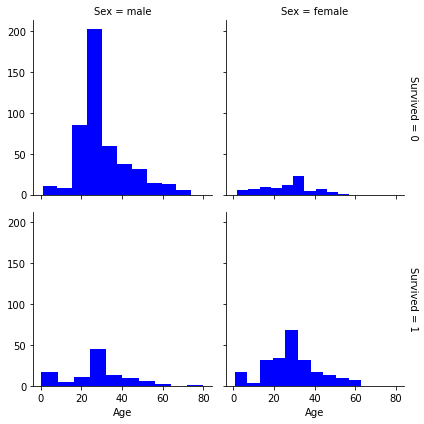

In [35]:
# You can create histogram with more dimensions by using matplotlib.pyplot Library

g = sns.FacetGrid(train, col='Sex', row='Survived', margin_titles=True)
g.map(plt.hist,'Age',color='blue')

#### Scatter Plot

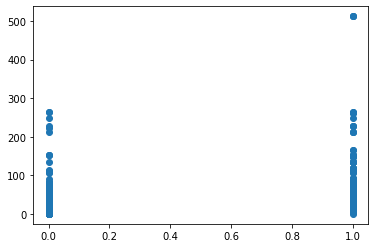

In [36]:
# Use plt.scatter() to create scatter plot

ax=plt.scatter(train['Survived'], train['Fare'])

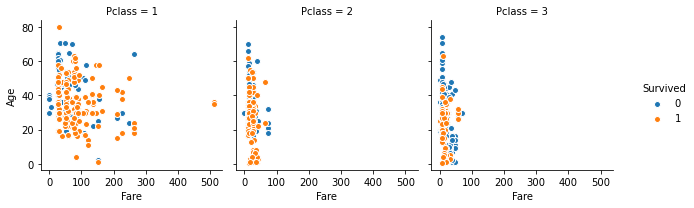

In [37]:
# Create scatter plot with more dimensions

g = sns.FacetGrid(train, hue='Survived', col='Pclass', margin_titles=True)
g=g.map(plt.scatter, 'Fare', 'Age',edgecolor='w').add_legend()

#### Binning / Discretization of Numeric Variables

- Let’s apply binning to 'Age'
- How many Age groups we should have? Domain knowledge

In [38]:
# Discritize / Binning Age feature, group into 3 equal interval groups

group_names = ['Young','Middel Age','Senior']
train['Age-binned']=pd.cut(train['Age'], 3, labels=group_names)

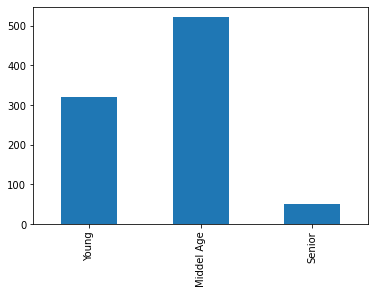

In [39]:
# Visualize the newly created variable ‘Age-binned’

train['Age-binned'].value_counts(sort=False).plot(kind='bar')

In [40]:
# Check train dataset and there is a new column called 'Age-binned'

train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age-binned
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Young
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Middel Age
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Young
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Middel Age
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Middel Age


#### Normalization of Numeric Variables

- The **preprocessing** module further provides a utility class **MinMaxScaler (StandardScaler)** that compute the range (mean and standard deviation) on a training set so as to be able to later reapply the same transformation on the testing set.

In [41]:
# We will need some functions from preprocessing library 

from sklearn import preprocessing

In [42]:
# Apply min-max normalization on a single attribute

minmax_scaler = preprocessing.MinMaxScaler().fit(train[['Fare']])
train['Fare_minmax']=minmax_scaler.transform(train[['Fare']])

# Display the results
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age-binned,Fare_minmax
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Young,0.014151
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Middel Age,0.139136
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Young,0.015469
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Middel Age,0.103644
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Middel Age,0.015713


In [43]:
# show statistics

train['Fare_minmax'].describe()

count    891.000000
mean       0.062858
std        0.096995
min        0.000000
25%        0.015440
50%        0.028213
75%        0.060508
max        1.000000
Name: Fare_minmax, dtype: float64

In [44]:
# Do the same transformation from training set on test set

test['Fare_minmax']=minmax_scaler.transform(test[['Fare']])

# Display the results
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_minmax
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.015282
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.013663
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.018909
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.016908
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.023984


In [45]:
# Apply z-score normalization on a single attribute

zscore_scaler = preprocessing.StandardScaler().fit(train[['Fare']])
train['Fare_zscore']=zscore_scaler.transform(train[['Fare']])

# Display the results

train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age-binned,Fare_minmax,Fare_zscore
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Young,0.014151,-0.502445
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Middel Age,0.139136,0.786845
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Young,0.015469,-0.488854
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Middel Age,0.103644,0.420730
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Middel Age,0.015713,-0.486337


In [46]:
# show statistics

train['Fare_zscore'].describe()

count    8.910000e+02
mean    -4.373606e-17
std      1.000562e+00
min     -6.484217e-01
25%     -4.891482e-01
50%     -3.573909e-01
75%     -2.424635e-02
max      9.667167e+00
Name: Fare_zscore, dtype: float64

In [47]:
# Do the same transformation from training set on test set

test['Fare_zscore']=zscore_scaler.transform(test[['Fare']])

# Display the results
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_minmax,Fare_zscore
PassengerId,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.015282,-0.490783
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.013663,-0.507479
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.018909,-0.453367
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.016908,-0.474005
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.023984,-0.401017


#### Create Dummy Variables / One-Hot-Encoder

In [48]:
# We can use pd.get_dummies to create dummy variables for categorical features 

train = pd.get_dummies(train, columns=['Sex'], prefix=['Sex'], drop_first=True)

In [49]:
# Do the same to create dummy variables for 'Embarked'

train = pd.get_dummies(train, columns=['Embarked'], prefix=['Embarked'], drop_first=True)

In [50]:
train.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Age-binned,Fare_minmax,Fare_zscore,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,Young,0.014151,-0.502445,1,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,Middel Age,0.139136,0.786845,0,0,0
3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,Young,0.015469,-0.488854,0,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,Middel Age,0.103644,0.420730,0,0,1
5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,Middel Age,0.015713,-0.486337,1,0,1


In [51]:
# Drop meaningless features, eg: 'Ticket', 'Name'

# Also drop duplicated features, eg: 'Sex', 'Embarked', 'Age', 'Fare', 'Fare_minmax'

train = train.drop(columns=['Name','Ticket'])

In [52]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Age-binned,Fare_minmax,Fare_zscore,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,Young,0.014151,-0.502445,1,0,1
2,1,1,38.0,1,0,71.2833,Middel Age,0.139136,0.786845,0,0,0
3,1,3,26.0,0,0,7.9250,Young,0.015469,-0.488854,0,0,1
4,1,1,35.0,1,0,53.1000,Middel Age,0.103644,0.420730,0,0,1
5,0,3,35.0,0,0,8.0500,Middel Age,0.015713,-0.486337,1,0,1
